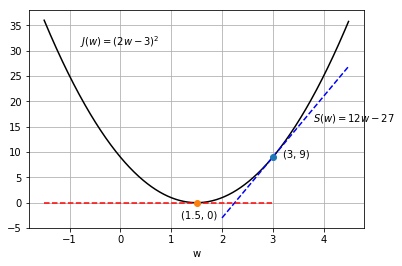

In [12]:
#gradient
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
w = np.arange(-1.5, 4.5, 0.01)
J = np.power(2*w-3,2)

x0,y0 = 3,9
x_min,y_min = 1.5, 0

w2 = w[np.where(w>2)]
slop = 12*(w2-x0)+y0
w3 = w[np.where(w < 3)]
slop2 = w3*0
# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.grid()

ax.plot(w, J, color="black")
ax.plot(w2, slop, 'b--')
ax.plot(w3, slop2, 'r--')
ax.set(xlabel='w', #ylabel='J(w)',
       title='')

ax.plot(x0, y0, marker='o')
ax.plot(x_min, y_min, marker='o')
formula = ax.text(-0.8, 31, r'$J(w)=(2w-3)^2$', fontsize=10)
formula2 = ax.text(3.8, 16, r'$S(w)=12w-27$', fontsize=10)
t = ax.text(x0+0.2, y0, str((x0, y0)), withdash = False)
max = ax.text(x_min-0.3, y_min-3, str((1.5, 0)), withdash = False)
#fig.savefig("test.png")


plt.show()

[array([-1, -3]), array([ 0.6 , -1.72]), array([ 1.56  , -0.8496]), array([ 2.136   , -0.257728]), array([2.4816    , 0.14474496]), array([2.68896   , 0.41842657]), array([2.813376  , 0.60453007])]


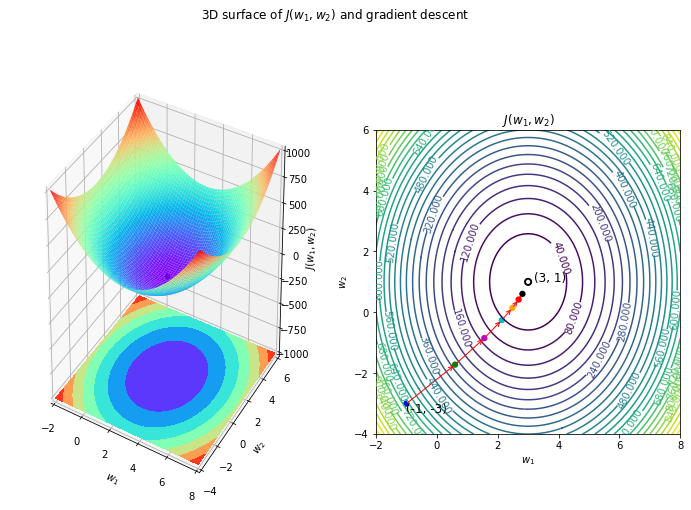

In [3]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

w1 = np.arange(-2, 8.02, 0.02)
w2 = np.arange(-4, 6.02, 0.02)
w1, w2 = np.meshgrid(w1, w2)

w1_true = 3
w2_true = 1
w1_0, w2_0 = -1, -3

def cost_func(w1, w2):
    return np.power(5*(w1-w1_true),2)+np.power(4*(w2-w2_true),2)

J = cost_func(w1, w2)

def grad_w1(w1):
    return 5*2*(w1-3)

def grad_w2(w2):
    return 4*2*(w2-1)

def cut_plain(w1, w2):
    k1, k2 = grad_w1(w1_0), grad_w2(w2_0)
    return k1 * (w1 - w1_0) + k2 * (w2 - w2_0) + cost_func(w1_0, w2_0)+300

fig = plt.figure(figsize=(12,8))#subplots(nrows=1, ncols=2, figsize=(12,8))
fig.suptitle(r'3D surface of $J(w_1,w_2)$ and gradient descent')
ax0 = fig.add_subplot(1,2,1, projection='3d')

# 切点
J_0 = cost_func(3,1)
ax0.scatter([3],[1],[J_0],c='k')

# 切平面
#w1_cut = np.arange(w1_0-3, w1_0+3, 0.02)
#w2_cut = np.arange(w2_0-3, w2_0+3, 0.02)
#w1_cut, w2_cut = np.meshgrid(w1_cut, w2_cut)
#Plain = cut_plain(w1_cut, w2_cut)

#ax0.plot_surface(w1_cut, w2_cut, Plain, rstride=8, cstride=8, alpha=1, cmap=cm.gray)

# Plot the 3D surface
ax0.plot_surface(w1, w2, J, rstride=8, cstride=8, alpha=1, cmap=cm.rainbow)
cset = ax0.contourf(w1, w2, J, zdir='z', offset=-1000,cmap=cm.rainbow)


ax0.set_xlim(-2, 8)
ax0.set_ylim(-4, 6)
ax0.set_zlim(-1000, 1000)

ax0.set_xlabel('$w_1$')
ax0.set_ylabel('$w_2$')
ax0.set_zlabel(r'$J(w_1,w_2)$')

ax1 =  fig.add_subplot(1, 2, 2, aspect='equal')
contours = ax1.contour(w1, w2, J, 30)
ax1.clabel(contours)
## The target parameter values indicated on the cost function contour plot
ax1.scatter([w1_true]*2,[w2_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 7
alpha = 0.04
theta = [np.array((-1,-3))]

for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha * grad_w1(last_theta[0])
    this_theta[1] = last_theta[1] - alpha * grad_w2(last_theta[1])
    theta.append(this_theta)

print(theta)
colors = ['b', 'g', 'm', 'c', 'orange', 'r','k']

for j in range(1,N):
    ax1.annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
ax1.scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax1.set_xlabel(r'$w_1$')
ax1.set_ylabel(r'$w_2$')
ax1.set_title(r'$J(w_1,w_2)$')
t = ax1.text(w1_true+0.2, w2_true, str((w1_true, w2_true)),fontsize=12, withdash = False)
t = ax1.text(w1_0, w2_0-0.3, str((w1_0, w2_0)),fontsize=12, withdash = False)
plt.show()

[array([-1, -3]), array([7. , 3.4]), array([-1.  , -0.44]), array([7.   , 1.864]), array([-1.    ,  0.4816]), array([7.     , 1.31104]), array([-1.      ,  0.813376])]


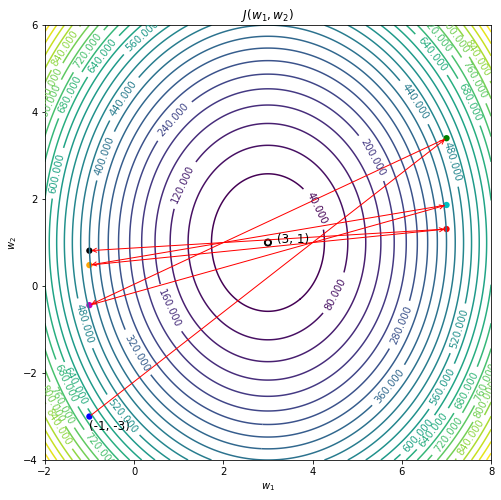

In [9]:
fig = plt.figure(figsize=(8,8))#subplots(nrows=1, ncols=2, figsize=(12,8))
#fig.suptitle(r'3D surface of $J(w_1,w_2)$ and gradient descent')
ax1 = fig.add_subplot(1,1,1)
contours = ax1.contour(w1, w2, J, 30)
ax1.clabel(contours)
## The target parameter values indicated on the cost function contour plot
ax1.scatter([w1_true]*2,[w2_true]*2,s=[50,10], color=['k','w'])

N = 7
alpha = 0.2
theta = [np.array((-1,-3))]

for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha * grad_w1(last_theta[0])
    this_theta[1] = last_theta[1] - alpha * grad_w2(last_theta[1])
    theta.append(this_theta)

print(theta)
colors = ['b', 'g', 'm', 'c', 'orange', 'r','k']

for j in range(1,N):
    ax1.annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
ax1.scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax1.set_xlabel(r'$w_1$')
ax1.set_ylabel(r'$w_2$')
ax1.set_title(r'$J(w_1,w_2)$')
t = ax1.text(w1_true+0.2, w2_true, str((w1_true, w2_true)),fontsize=12, withdash = False)
t = ax1.text(w1_0, w2_0-0.3, str((w1_0, w2_0)),fontsize=12, withdash = False)
plt.show()

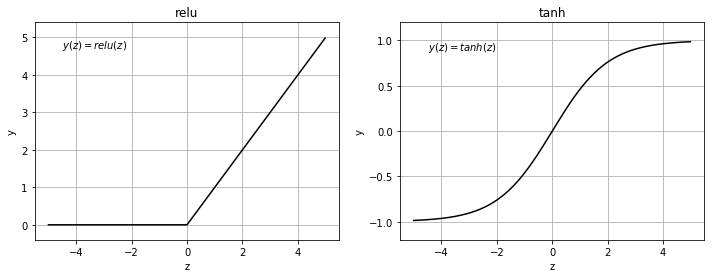

In [45]:
#activation funciton tahn and relu
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from torch.autograd import Variable

def tanh(x):
    a = np.power(np.e,-x)
    return (1-a) / (1+a)

def relu(x):
    a = np.clip(x, a_min=0, a_max=x)
    return a

# Data for plotting
x = np.arange(-5, 5, 0.02)
y_tanh = tanh(x)
y_relu = relu(x)


fig = plt.figure(figsize=(12,4))#subplots(nrows=1, ncols=2, figsize=(12,8))
#fig.suptitle(r'3D surface of $J(w_1,w_2)$ and gradient descent')
ax0 = fig.add_subplot(1,2,1)
ax0.grid()
ax0.plot(x, y_relu, color="black")
ax0.set(xlabel='z', ylabel='y', title='relu')
ax0.set_ylim(-0.4, 5.4)
formula = ax0.text(-4.5, 4.7, r'$y(z)=relu(z)$', fontsize=10)

ax1 = fig.add_subplot(1,2,2)
ax1.grid()
ax1.plot(x, y_tanh, color="black")
ax1.set(xlabel='z', ylabel='y', title='tanh')
ax1.set_ylim(-1.2, 1.2)
formula = ax1.text(-4.5, 0.89, r'$y(z)=tanh(z)$', fontsize=10)

plt.show()